# **Predict house prices with regression algorithms and sklearn**

In [3]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization
import math  # For mathematical functions
import warnings  # For managing warning messages

# Importing specific classes and functions from scikit-learn
from sklearn.preprocessing import OneHotEncoder  # For converting categorical variables into a format that can be provided to ML algorithms
from sklearn.preprocessing import StandardScaler  # For standardizing features by removing the mean and scaling to unit variance
from sklearn.compose import ColumnTransformer  # For applying different preprocessing steps to different columns
from sklearn.impute import SimpleImputer  # For handling missing values in the dataset
from sklearn.pipeline import Pipeline  # For creating a pipeline of transformations and model fitting
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating the performance of regression models

# Define a custom warning function that suppresses warnings
def warn(*args, **kwargs):
    pass

# Override the default warning function to suppress all warnings
warnings.warn = warn
# Ignore all warnings that may arise during execution
warnings.filterwarnings('ignore')

### Defining helper functions

Define some functions that will be used repeatedly for visualization.


In [111]:
def two_d_compare(X_test, y_test, y_pred, model_name):
    """
    Compares actual vs predicted values in a 2D scatter plot for a given model.

    Args:
        X_test (array-like): The input features used for testing.
        y_test (array-like): The actual target values (ground truth).
        y_pred (array-like): The predicted target values from the model.
        model_name (str): The name of the model being evaluated.

    Returns:
        None. Displays a figure with two subplots: one for actual values and one for predicted values.
    """
    # Create a figure with two subplots side by side for comparison
    plt.subplots(ncols=2, figsize=(10, 4))

    # Set the overall title for the figure, including the model name and the R² score
    plt.suptitle(f'Actual vs Predicted Data: {model_name}. Variance score: {r2_score(y_test, y_pred):.2f}')

    # First subplot: Scatter plot of actual values
    plt.subplot(121)  # Select the first subplot (1 row, 2 columns, 1st position)
    plt.scatter(X_test, y_test, alpha=0.5, color='blue', label='Actual')  # Plot actual values in blue
    plt.title('Actual Values')  # Title for the first subplot
    plt.legend()  # Add a legend to distinguish the plot

    # Second subplot: Scatter plot of predicted values
    plt.subplot(122)  # Select the second subplot (1 row, 2 columns, 2nd position)
    plt.scatter(X_test, y_pred, alpha=0.3, color='red', label='Predicted')  # Plot predicted values in red
    plt.title('Predicted Values')  # Title for the second subplot
    plt.legend()  # Add a legend to distinguish the plot

    # Display the plots
    plt.show()


def model_metrics(regressor, y_test, y_pred):
    """
    Calculates and prints key performance metrics for a regression model.

    Args:
        regressor: The regression model being evaluated (not directly used in this function).
        y_test (array-like): The actual target values (ground truth).
        y_pred (array-like): The predicted target values from the model.

    Returns:
        list: A list containing the Mean Squared Error (MSE) and R² score.
    """
    # Calculate Mean Squared Error (MSE) between actual and predicted values
    mse = mean_squared_error(y_test, y_pred)
    # Print the Root Mean Squared Error (RMSE), which is the square root of MSE
    print(f"Root Mean Squared Error: {math.sqrt(mse):.2f}")

    # Calculate R² score to evaluate the model's performance
    r2 = r2_score(y_test, y_pred)
    # Print the R² score, which indicates the proportion of variance explained by the model
    print(f'R² Score: {r2:.2f}')

    # Return a list containing MSE and R² score for further analysis
    return [mse, r2]


def two_vs_three(x_test, y_test, y_pred, z=None, isLinear=False):
    """
    Visualizes actual vs predicted values in a 2D scatter plot, with optional 3D support.

    Args:
        x_test (array-like): The input feature used for testing (e.g., 'YEARBUILT').
        y_test (array-like): The actual target values (ground truth).
        y_pred (array-like): The predicted target values from the model.
        z (array-like, optional): A third dimension for 3D visualization (not used in this function).
        isLinear (bool, optional): Indicates whether the model is linear (not used in this function).

    Returns:
        None. Displays a scatter plot comparing actual and predicted values.
    """
    # Set the area size for the scatter plot markers
    area = 60

    # Create a new figure for the plot
    fig = plt.figure(figsize=(6, 6))
    fig.suptitle('View of Sales Price Data')  # Set the title for the figure

    # Create a single subplot for the scatter plot
    ax = fig.add_subplot(1, 1, 1)

    # Scatter plot for actual selling prices
    ax.scatter(x_test, y_test, alpha=0.5, color='blue', s=area, label='Actual')  # Actual values in blue
    # Scatter plot for predicted selling

### Load data

In the following snippet, you use the pandas library to load a .csv file that contains housing-related information. With several independent variables related to this domain, you are going to predict the sales price of a house.


In [5]:
# Load the dataset from a specified URL into a Pandas DataFrame
df_pd = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/O9xijcDVZM-5MCjMyPtxwQ/house-price.csv")

# Display the first five rows of the DataFrame to get an overview of the data
df_pd.head()

,ID,LOTAREA,BLDGTYPE,HOUSESTYLE,OVERALLCOND,YEARBUILT,ROOFSTYLE,EXTERCOND,FOUNDATION,BSMTCOND,...,GARAGETYPE,GARAGEFINISH,GARAGECARS,GARAGECOND,POOLAREA,POOLQC,FENCE,MOSOLD,YRSOLD,SALEPRICE
0,1,8450,1Fam,2Story,5,2003,Gable,TA,PConc,TA,...,Attchd,RFn,2,TA,0,NaN,NaN,2,2008,208500
1,2,9600,1Fam,1Story,8,1976,Gable,TA,CBlock,TA,...,Attchd,RFn,2,TA,0,NaN,NaN,5,2007,181500
2,3,11250,1Fam,2Story,5,2001,Gable,TA,PConc,TA,...,Attchd,RFn,2,TA,0,NaN,NaN,9,2008,223500
3,4,9550,1Fam,2Story,5,1915,Gable,TA,BrkTil,Gd,...,Detchd,Unf,3,TA,0,NaN,NaN,2,2006,140000
4,5,14260,1Fam,2Story,5,2000,Gable,TA,PConc,TA,...,Attchd,RFn,3,TA,0,NaN,NaN,12,2008,250000


In [7]:
# Retrieve and display the column names of the DataFrame
df_pd.columns

Index(['ID', 'LOTAREA', 'BLDGTYPE', 'HOUSESTYLE', 'OVERALLCOND', 'YEARBUILT',
       'ROOFSTYLE', 'EXTERCOND', 'FOUNDATION', 'BSMTCOND', 'HEATING',
       'HEATINGQC', 'CENTRALAIR', 'ELECTRICAL', 'FULLBATH', 'HALFBATH',
       'BEDROOMABVGR', 'KITCHENABVGR', 'KITCHENQUAL', 'TOTRMSABVGRD',
       'FIREPLACES', 'FIREPLACEQU', 'GARAGETYPE', 'GARAGEFINISH', 'GARAGECARS',
       'GARAGECOND', 'POOLAREA', 'POOLQC', 'FENCE', 'MOSOLD', 'YRSOLD',
       'SALEPRICE'],
      dtype='object')

In [8]:
# Display a concise summary of the DataFrame, including the index dtype, column dtypes, non-null values, and memory usage
df_pd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            1460 non-null   int64 
 1   LOTAREA       1460 non-null   int64 
 2   BLDGTYPE      1460 non-null   object
 3   HOUSESTYLE    1460 non-null   object
 4   OVERALLCOND   1460 non-null   int64 
 5   YEARBUILT     1460 non-null   int64 
 6   ROOFSTYLE     1460 non-null   object
 7   EXTERCOND     1460 non-null   object
 8   FOUNDATION    1460 non-null   object
 9   BSMTCOND      1423 non-null   object
 10  HEATING       1460 non-null   object
 11  HEATINGQC     1460 non-null   object
 12  CENTRALAIR    1460 non-null   object
 13  ELECTRICAL    1459 non-null   object
 14  FULLBATH      1460 non-null   int64 
 15  HALFBATH      1460 non-null   int64 
 16  BEDROOMABVGR  1460 non-null   int64 
 17  KITCHENABVGR  1460 non-null   int64 
 18  KITCHENQUAL   1460 non-null   object
 19  TOTRMS

In [9]:
# Generate descriptive statistics for the DataFrame, summarizing the central tendency, dispersion, and shape of the dataset's distribution
df_pd.describe()

,ID,LOTAREA,OVERALLCOND,YEARBUILT,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,TOTRMSABVGRD,FIREPLACES,GARAGECARS,POOLAREA,MOSOLD,YRSOLD,SALEPRICE
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,10516.828082,5.575342,1971.267808,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,2.758904,6.321918,2007.815753,180921.195890
std,421.610009,9981.264932,1.112799,30.202904,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,40.177307,2.703626,1.328095,79442.502883
min,1.000000,1300.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,7553.500000,5.000000,1954.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,9478.500000,5.000000,1973.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,11601.500000,6.000000,2000.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,215245.000000,9.000000,2010.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,738.000000,12.000000,2010.000000,755000.000000


In [10]:
# Retrieve the dimensions of the DataFrame, returning the number of rows and columns
df_pd.shape

(1460, 32)

### Data exploration
Before you explore any models, let's get to know the data set better. In this section, you'll a quick look at the columns in the data set and examine how the sale price varies depending on the year the house was built. Additionally, you'll check for any missing values.


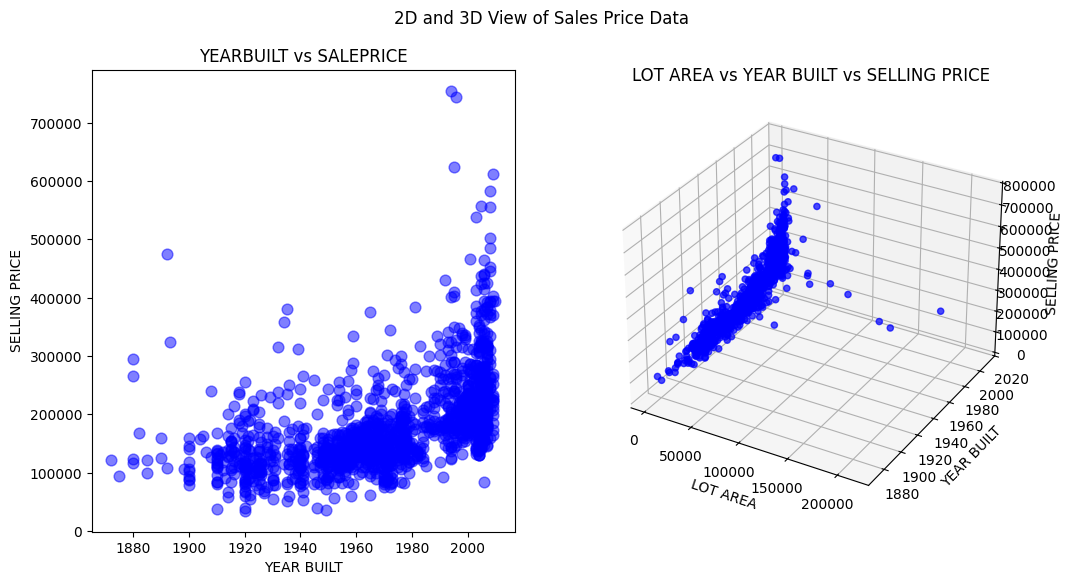

In [20]:
# Set the area size for the scatter plot markers
area = 60

# Extract relevant columns from the DataFrame for plotting
x = df_pd['YEARBUILT']  # Year the house was built
y = df_pd['SALEPRICE']   # Selling price of the house
z = df_pd['LOTAREA']     # Lot area of the property

# Create a new figure for the plots with specified dimensions
fig = plt.figure(figsize=(12, 6))
fig.suptitle('2D and 3D View of Sales Price Data')  # Set the overall title for the figure

# First subplot: 2D scatter plot of YEARBUILT vs SALEPRICE
ax = fig.add_subplot(1, 2, 1)  # Create a subplot in a 1x2 grid, first position

# Create a scatter plot for YEARBUILT vs SALEPRICE
ax.scatter(x, y, alpha=0.5, color='blue', s=area)  # Scatter plot with specified marker size and color
ax.set_xlabel('YEAR BUILT')  # Label for the x-axis
ax.set_ylabel('SELLING PRICE')  # Label for the y-axis
plt.title('YEARBUILT vs SALEPRICE')  # Title for the first subplot

# Second subplot: 3D scatter plot of LOTAREA, YEARBUILT, and SALEPRICE
ax = fig.add_subplot(1, 2, 2, projection='3d',alpha=0.7)  # Create a 3D subplot in a 1x2 grid, second position

# Create a 3D scatter plot
ax.scatter(z, x, y, color='blue', marker='o',alpha=0.7)  # Scatter plot with LOTAREA on the x-axis, YEARBUILT on the y-axis, and SALEPRICE on the z-axis


# Set axis labels for the 3D plot
ax.set_xlabel('LOT AREA')  # Label for the x-axis
ax.set_ylabel('YEAR BUILT')  # Label for the y-axis
ax.set_zlabel('SELLING PRICE')  # Label for the z-axis
plt.title('LOT AREA vs YEAR BUILT vs SELLING PRICE')  # Title for the second subplot

# Display the plots
plt.show()

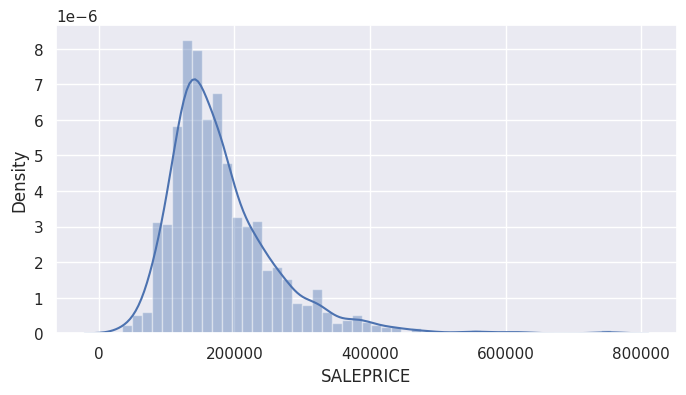

In [22]:
# Set the default size of the figures for Seaborn plots to 8 inches wide and 4 inches tall
# The 'rc' stands for "runtime configuration," allowing customization of plot aesthetics globally
sns.set(rc={"figure.figsize": (8, 4)})

# Set the random seed for NumPy's random number generator to ensure reproducibility of results
# This means that any random processes will produce the same output each time the code is run
np.random.seed(0)

# Create a distribution plot (histogram and kernel density estimate) for the 'SALEPRICE' column
# This plot visualizes the distribution of sale prices, helping to identify patterns such as skewness and modality
ax = sns.distplot(df_pd['SALEPRICE'])

# Display the plot to the user
plt.show()

This data looks log-normal (skewed). Try using log(SALEPRICE) instead of raw prices—some models (like linear regression) work better with normal distributions.

But: Tree-based models (XGBoost, random forest) don’t care—they work fine either way. 🌲🚀

(Short, clear, and skips unnecessary details.)

In [23]:
# Display a concise summary of the DataFrame 'df_pd'
# This includes the number of entries (rows), the number of columns,
# the data types of each column, and the count of non-null values in each column.
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            1460 non-null   int64 
 1   LOTAREA       1460 non-null   int64 
 2   BLDGTYPE      1460 non-null   object
 3   HOUSESTYLE    1460 non-null   object
 4   OVERALLCOND   1460 non-null   int64 
 5   YEARBUILT     1460 non-null   int64 
 6   ROOFSTYLE     1460 non-null   object
 7   EXTERCOND     1460 non-null   object
 8   FOUNDATION    1460 non-null   object
 9   BSMTCOND      1423 non-null   object
 10  HEATING       1460 non-null   object
 11  HEATINGQC     1460 non-null   object
 12  CENTRALAIR    1460 non-null   object
 13  ELECTRICAL    1459 non-null   object
 14  FULLBATH      1460 non-null   int64 
 15  HALFBATH      1460 non-null   int64 
 16  BEDROOMABVGR  1460 non-null   int64 
 17  KITCHENABVGR  1460 non-null   int64 
 18  KITCHENQUAL   1460 non-null   object
 19  TOTRMS

In [11]:
# Print a message indicating the data types of the columns in the DataFrame 'df_pd'
# The 'dtypes' attribute returns a Series with the data type of each column
# The output is converted to a string and concatenated with the message for display
print("The dataset contains columns of the following data types : \n" + str(df_pd.dtypes))

The dataset contains columns of the following data types : 
ID               int64
LOTAREA          int64
BLDGTYPE        object
HOUSESTYLE      object
OVERALLCOND      int64
YEARBUILT        int64
ROOFSTYLE       object
EXTERCOND       object
FOUNDATION      object
BSMTCOND        object
HEATING         object
HEATINGQC       object
CENTRALAIR      object
ELECTRICAL      object
FULLBATH         int64
HALFBATH         int64
BEDROOMABVGR     int64
KITCHENABVGR     int64
KITCHENQUAL     object
TOTRMSABVGRD     int64
FIREPLACES       int64
FIREPLACEQU     object
GARAGETYPE      object
GARAGEFINISH    object
GARAGECARS       int64
GARAGECOND      object
POOLAREA         int64
POOLQC          object
FENCE           object
MOSOLD           int64
YRSOLD           int64
SALEPRICE        int64
dtype: object


In [12]:
# Print a message indicating the number of records (non-null values) for each column in the DataFrame 'df_pd'
# The 'count()' method returns a Series with the count of non-null entries for each column
# The output is converted to a string and concatenated with the message for display
print("The dataset contains the following number of records for each of the columns : \n" + str(df_pd.count()))

The dataset contains the following number of records for each of the columns : 
ID              1460
LOTAREA         1460
BLDGTYPE        1460
HOUSESTYLE      1460
OVERALLCOND     1460
YEARBUILT       1460
ROOFSTYLE       1460
EXTERCOND       1460
FOUNDATION      1460
BSMTCOND        1423
HEATING         1460
HEATINGQC       1460
CENTRALAIR      1460
ELECTRICAL      1459
FULLBATH        1460
HALFBATH        1460
BEDROOMABVGR    1460
KITCHENABVGR    1460
KITCHENQUAL     1460
TOTRMSABVGRD    1460
FIREPLACES      1460
FIREPLACEQU      770
GARAGETYPE      1379
GARAGEFINISH    1379
GARAGECARS      1460
GARAGECOND      1379
POOLAREA        1460
POOLQC             7
FENCE            281
MOSOLD          1460
YRSOLD          1460
SALEPRICE       1460
dtype: int64


In [24]:
df_pd.isna()


,ID,LOTAREA,BLDGTYPE,HOUSESTYLE,OVERALLCOND,YEARBUILT,ROOFSTYLE,EXTERCOND,FOUNDATION,BSMTCOND,...,GARAGETYPE,GARAGEFINISH,GARAGECARS,GARAGECOND,POOLAREA,POOLQC,FENCE,MOSOLD,YRSOLD,SALEPRICE
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False


In [25]:
df_pd.notna()


,ID,LOTAREA,BLDGTYPE,HOUSESTYLE,OVERALLCOND,YEARBUILT,ROOFSTYLE,EXTERCOND,FOUNDATION,BSMTCOND,...,GARAGETYPE,GARAGEFINISH,GARAGECARS,GARAGECOND,POOLAREA,POOLQC,FENCE,MOSOLD,YRSOLD,SALEPRICE
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,False,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,False,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,False,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,False,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,False,True,True,True
1456,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,True,True,True,True
1457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,True,True,True,True
1458,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,False,True,True,True


In [65]:
df_pd.isnull()

,ID,LOTAREA,BLDGTYPE,HOUSESTYLE,OVERALLCOND,YEARBUILT,ROOFSTYLE,EXTERCOND,FOUNDATION,BSMTCOND,...,GARAGETYPE,GARAGEFINISH,GARAGECARS,GARAGECOND,POOLAREA,POOLQC,FENCE,MOSOLD,YRSOLD,SALEPRICE
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False


In [68]:
# Check for the presence of any null (missing) values in each column of the DataFrame 'df_pd'
# The 'isnull()' method returns a DataFrame of the same shape as 'df_pd',
# with True for each null value and False for non-null values.
# The 'any()' method is then applied to this DataFrame to return a Series indicating
# whether each column contains at least one null value (True) or not (False).
df_pd.isnull().any()

,0
ID,False
LOTAREA,False
BLDGTYPE,False
HOUSESTYLE,False
OVERALLCOND,False
YEARBUILT,False
ROOFSTYLE,False
EXTERCOND,False
FOUNDATION,False
BSMTCOND,True


In [15]:
# Calculate the total number of null (missing) values for each column in the DataFrame 'df_pd'
# The 'isnull()' method returns a DataFrame of the same shape as 'df_pd',
# with True for each null value and False for non-null values.
# The 'sum()' method is then applied to this boolean DataFrame to count the number of True values
# (i.e., the number of null values) in each column, resulting in a Series with the count of nulls.
df_pd.isnull().sum()

,0
ID,0
LOTAREA,0
BLDGTYPE,0
HOUSESTYLE,0
OVERALLCOND,0
YEARBUILT,0
ROOFSTYLE,0
EXTERCOND,0
FOUNDATION,0
BSMTCOND,37


In [28]:
# Identify columns in the DataFrame 'df_pd' that contain null (missing) values
# The 'isnull().sum()' method calculates the total number of null values for each column.
# The result is filtered using '[df_pd.isnull().any()]' to select only those columns that have at least one null value.
# The resulting Series, 'null_cols', contains the names of the columns with nulls and their corresponding counts of null values.
null_cols = df_pd.isnull().sum()[df_pd.isnull().any()]

# Print the Series 'null_cols' to display the columns with null values and their counts
print("the columns with null values and their counts: \n")

print(null_cols)

the columns with null values and their counts: 

BSMTCOND          37
ELECTRICAL         1
FIREPLACEQU      690
GARAGETYPE        81
GARAGEFINISH      81
GARAGECOND        81
POOLQC          1453
FENCE           1179
dtype: int64


### Data preparation
Data preparation is a crucial step in machine learning model building because a model can only perform well when it is trained on good and well-prepared data. Consequently, this step consumes the bulk of a data scientist's time spent building models.

During this process, you identify categorical columns in the data set. Categories must be indexed, meaning that the string labels must be converted to numerical label indices. These label indices are then encoded using one-hot encoding into a binary vector, with at most a single one-value indicating the presence of a specific feature value among the set of all feature values. This encoding allows algorithms that expect continuous features to utilize categorical features effectively.

In [29]:
#remove columns that are not required
df_pd = df_pd.drop(['ID'], axis=1)

df_pd.head()

,LOTAREA,BLDGTYPE,HOUSESTYLE,OVERALLCOND,YEARBUILT,ROOFSTYLE,EXTERCOND,FOUNDATION,BSMTCOND,HEATING,...,GARAGETYPE,GARAGEFINISH,GARAGECARS,GARAGECOND,POOLAREA,POOLQC,FENCE,MOSOLD,YRSOLD,SALEPRICE
0,8450,1Fam,2Story,5,2003,Gable,TA,PConc,TA,GasA,...,Attchd,RFn,2,TA,0,NaN,NaN,2,2008,208500
1,9600,1Fam,1Story,8,1976,Gable,TA,CBlock,TA,GasA,...,Attchd,RFn,2,TA,0,NaN,NaN,5,2007,181500
2,11250,1Fam,2Story,5,2001,Gable,TA,PConc,TA,GasA,...,Attchd,RFn,2,TA,0,NaN,NaN,9,2008,223500
3,9550,1Fam,2Story,5,1915,Gable,TA,BrkTil,Gd,GasA,...,Detchd,Unf,3,TA,0,NaN,NaN,2,2006,140000
4,14260,1Fam,2Story,5,2000,Gable,TA,PConc,TA,GasA,...,Attchd,RFn,3,TA,0,NaN,NaN,12,2008,250000


In [38]:
df_pd.select_dtypes(include=['int'])

,LOTAREA,OVERALLCOND,YEARBUILT,FULLBATH,HALFBATH,BEDROOMABVGR,KITCHENABVGR,TOTRMSABVGRD,FIREPLACES,GARAGECARS,POOLAREA,MOSOLD,YRSOLD,SALEPRICE
0,8450,5,2003,2,1,3,1,8,0,2,0,2,2008,208500
1,9600,8,1976,2,0,3,1,6,1,2,0,5,2007,181500
2,11250,5,2001,2,1,3,1,6,1,2,0,9,2008,223500
3,9550,5,1915,1,0,3,1,7,1,3,0,2,2006,140000
4,14260,5,2000,2,1,4,1,9,1,3,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,5,1999,2,1,3,1,7,1,2,0,8,2007,175000
1456,13175,6,1978,2,0,3,1,7,2,2,0,2,2010,210000
1457,9042,9,1941,2,0,4,1,9,2,1,0,5,2010,266500
1458,9717,6,1950,1,0,2,1,5,0,1,0,4,2010,142125


In [36]:
df_pd.select_dtypes(include='object')

,BLDGTYPE,HOUSESTYLE,ROOFSTYLE,EXTERCOND,FOUNDATION,BSMTCOND,HEATING,HEATINGQC,CENTRALAIR,ELECTRICAL,KITCHENQUAL,FIREPLACEQU,GARAGETYPE,GARAGEFINISH,GARAGECOND,POOLQC,FENCE
0,1Fam,2Story,Gable,TA,PConc,TA,GasA,Ex,Y,SBrkr,Gd,NaN,Attchd,RFn,TA,NaN,NaN
1,1Fam,1Story,Gable,TA,CBlock,TA,GasA,Ex,Y,SBrkr,TA,TA,Attchd,RFn,TA,NaN,NaN
2,1Fam,2Story,Gable,TA,PConc,TA,GasA,Ex,Y,SBrkr,Gd,TA,Attchd,RFn,TA,NaN,NaN
3,1Fam,2Story,Gable,TA,BrkTil,Gd,GasA,Gd,Y,SBrkr,Gd,Gd,Detchd,Unf,TA,NaN,NaN
4,1Fam,2Story,Gable,TA,PConc,TA,GasA,Ex,Y,SBrkr,Gd,TA,Attchd,RFn,TA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1Fam,2Story,Gable,TA,PConc,TA,GasA,Ex,Y,SBrkr,TA,TA,Attchd,RFn,TA,NaN,NaN
1456,1Fam,1Story,Gable,TA,CBlock,TA,GasA,TA,Y,SBrkr,TA,TA,Attchd,Unf,TA,NaN,MnPrv
1457,1Fam,2Story,Gable,Gd,Stone,Gd,GasA,Ex,Y,SBrkr,Gd,Gd,Attchd,RFn,TA,NaN,GdPrv
1458,1Fam,1Story,Hip,TA,CBlock,TA,GasA,Gd,Y,FuseA,Gd,NaN,Attchd,Unf,TA,NaN,NaN


In [56]:
df_pd.select_dtypes(include=['int']).columns

Index(['LOTAREA', 'OVERALLCOND', 'YEARBUILT', 'FULLBATH', 'HALFBATH',
       'BEDROOMABVGR', 'KITCHENABVGR', 'TOTRMSABVGRD', 'FIREPLACES',
       'GARAGECARS', 'POOLAREA', 'MOSOLD', 'YRSOLD', 'SALEPRICE'],
      dtype='object')

In [57]:
df_pd.select_dtypes(include=['object']).columns

Index(['BLDGTYPE', 'HOUSESTYLE', 'ROOFSTYLE', 'EXTERCOND', 'FOUNDATION',
       'BSMTCOND', 'HEATING', 'HEATINGQC', 'CENTRALAIR', 'ELECTRICAL',
       'KITCHENQUAL', 'FIREPLACEQU', 'GARAGETYPE', 'GARAGEFINISH',
       'GARAGECOND', 'POOLQC', 'FENCE'],
      dtype='object')

In [58]:
# Identify and define the categorical columns in the DataFrame 'df_pd'
# The 'select_dtypes(include=['object'])' method filters the DataFrame to include only columns with the 'object' data type,
# which typically represent categorical or text-based data.
# The '.columns' attribute extracts the names of these columns, storing them in the variable 'categoricalColumns'.
categoricalColumns = df_pd.select_dtypes(include=['object']).columns

# Print a message to indicate that the following output lists the categorical columns
print("Categorical columns: ")

# Print the names of the categorical columns stored in 'categoricalColumns'
print(categoricalColumns)

Categorical columns: 
Index(['BLDGTYPE', 'HOUSESTYLE', 'ROOFSTYLE', 'EXTERCOND', 'FOUNDATION',
       'BSMTCOND', 'HEATING', 'HEATINGQC', 'CENTRALAIR', 'ELECTRICAL',
       'KITCHENQUAL', 'FIREPLACEQU', 'GARAGETYPE', 'GARAGEFINISH',
       'GARAGECOND', 'POOLQC', 'FENCE'],
      dtype='object')


In [59]:
# Create an imputer to fill missing values in categorical columns with the most frequent category
impute_categorical = SimpleImputer(strategy='most_frequent')

# Create a one-hot encoder to convert categorical values into a numerical format,
# while ignoring any new categories that were not present during fitting
onehot_categorical = OneHotEncoder(handle_unknown='ignore')

# Build a pipeline that first imputes missing values, then applies one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('impute', impute_categorical),  # Step 1: Fill missing values using the imputer
    ('onehot', onehot_categorical)    # Step 2: Convert categorical data to numerical format using one-hot encoding
])

In [60]:
# Identify numerical columns in the DataFrame 'df_pd' (columns with 'float' or 'int' data types)
# The 'select_dtypes(include=['float', 'int'])' method filters the DataFrame to include only numerical columns.
# The list comprehension further excludes the target column 'SALEPRICE' from the list of numerical columns.
numericalColumns = [col for col in df_pd.select_dtypes(include=['float', 'int']).columns
                   if col not in ['SALEPRICE']]

# Print a message to indicate that the following output lists the numerical columns
print("Numerical columns except the 'SALEPRICE' which is Target variable:\n ")

# Print the names of the numerical columns stored in 'numericalColumns'
print(numericalColumns)

Numerical columns except the 'SALEPRICE' which is Target variable:
 
['LOTAREA', 'OVERALLCOND', 'YEARBUILT', 'FULLBATH', 'HALFBATH', 'BEDROOMABVGR', 'KITCHENABVGR', 'TOTRMSABVGRD', 'FIREPLACES', 'GARAGECARS', 'POOLAREA', 'MOSOLD', 'YRSOLD']


In [61]:

# Create a StandardScaler to normalize numerical features (mean=0, std=1)
scaler_numerical = StandardScaler()

# Build a pipeline with just the scaling step
numerical_transformer = Pipeline(steps=[
    ('scale', scaler_numerical)  # Single step: Standardize numerical values
])

In [63]:
# Create a ColumnTransformer to preprocess only categorical columns
# This will apply the specified transformations to categorical columns while leaving other columns unchanged
preprocessorForCategoricalColumns = ColumnTransformer(
    transformers=[
        # The transformer consists of a single transformation step:
        ('cat',                  # Name/identifier for this transformation step
         categorical_transformer, # The actual transformer to apply (e.g., OneHotEncoder, OrdinalEncoder)
         categoricalColumns),    # List of column names/indices to apply this transformation to
    ],
    remainder="passthrough"      # All columns not specified in transformers will be passed through without changes
)

# Create a ColumnTransformer to preprocess both categorical and numerical columns
# This will apply different transformations to different column types
preprocessorForAllColumns = ColumnTransformer(
    transformers=[
        # First transformation step for categorical columns
        ('cat',                  # Name/identifier for this transformation
         categorical_transformer, # Transformer for categorical data
         categoricalColumns),    # Columns to apply categorical transformation to

        # Second transformation step for numerical columns
        ('num',                  # Name/identifier for this transformation
         numerical_transformer,  # Transformer for numerical data (e.g., StandardScaler, MinMaxScaler)
         numericalColumns),      # Columns to apply numerical transformation to
    ],
    remainder="passthrough"      # Any columns not specified above will pass through unchanged
)

# Note:
# - categorical_transformer and numerical_transformer should be predefined pipeline/transformers
# - categoricalColumns and numericalColumns should be lists of column names/indices
# - The 'remainder="passthrough"' option ensures columns not explicitly transformed are included in output
# - These preprocessors can be used in a Pipeline with an estimator for complete ML workflow

In [64]:
# Apply preprocessing to only categorical columns and store the result in a temporary variable
# 'preprocessorForCategoricalColumns' is a transformer designed to handle categorical features (e.g., OneHotEncoder)
df_pd_temp = preprocessorForCategoricalColumns.fit_transform(df_pd)

# Print a message to indicate the transformed data for categorical columns
print("Data after transforming categorical columns:\n")
print(df_pd_temp)  # Display the transformed data (likely one-hot encoded or label encoded)

# Apply comprehensive preprocessing to ALL columns (both numeric and categorical)
# 'preprocessorForAllColumns' is a ColumnTransformer or Pipeline that handles all feature types
df_pd_temp_2 = preprocessorForAllColumns.fit_transform(df_pd)

# Print a message to indicate the fully processed data
print("\nData after transforming all columns (numeric + categorical):\n")
print(df_pd_temp_2)  # Display the fully processed data, ready for modeling

Data after transforming categorical columns:

[[1.00000e+00 0.00000e+00 0.00000e+00 ... 2.00000e+00 2.00800e+03
  2.08500e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 5.00000e+00 2.00700e+03
  1.81500e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 9.00000e+00 2.00800e+03
  2.23500e+05]
 ...
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 5.00000e+00 2.01000e+03
  2.66500e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 4.00000e+00 2.01000e+03
  1.42125e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 6.00000e+00 2.00800e+03
  1.47500e+05]]

Data after transforming all columns (numeric + categorical):

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.59911110e+00
   1.38777489e-01  2.08500000e+05]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -4.89110051e-01
  -6.14438622e-01  1.81500000e+05]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.90891347e-01
   1.38777489e-01  2.23500000e+05]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -4.89110051e-01
   1.6452

In [66]:
print(f"Shape after categorical transform: {df_pd_temp.shape}")
print(f"Shape after full transform: {df_pd_temp_2.shape}")

Shape after categorical transform: (1460, 96)
Shape after full transform: (1460, 96)


In [26]:
import logging
logging.info(f"Categorical transformation complete. Shape: {df_pd_temp.shape}")

In [68]:
# Prepare dataframe for splitting into train and test datasets
# ---------------------------------------------------------

# FEATURES (X) - All columns except the target ('SALEPRICE')
# Using drop() to exclude the target column and keep all other columns as features

features = df_pd.drop(['SALEPRICE'], axis=1)  # axis=1 indicates we're dropping a column

# LABEL/TARGET (y) - We want to predict 'SALEPRICE'
# Taking log of SALEPRICE because:
# 1. House prices often have exponential relationships that become linear when logged
# 2. Helps normalize skewed price distributions
# 3. Reduces impact of extreme values (outliers)

label = np.log(df_pd['SALEPRICE'])

# Debug print to verify label values
# This helps check:
# - Successful log transformation NATURAL LOGARITHMS OF **Ln**
# - No NaN/infinite values
# - Reasonable value ranges

print("Value of label after log transformation: \n" + str(label.head()))  # Show first 5 values instead of all

Value of label after log transformation: 
0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SALEPRICE, dtype: float64


In [72]:
# Value of label before natural logarithm
print(" Value of label before natural logarithm:\n")
df_pd['SALEPRICE'].head()

 Value of label before natural logarithm:



,SALEPRICE
0,208500
1,181500
2,223500
3,140000
4,250000


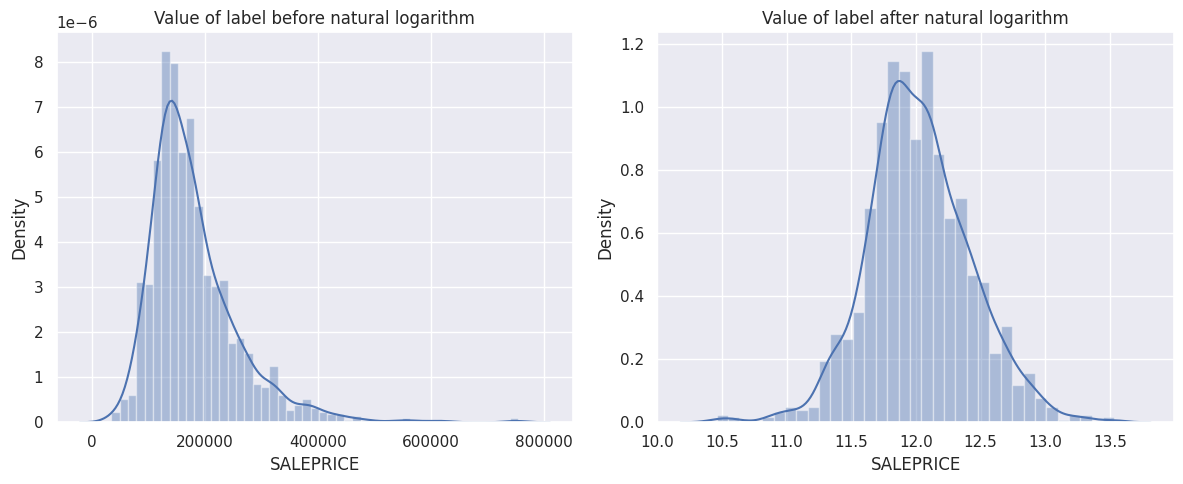

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for the combined plot
sns.set(rc={"figure.figsize": (12, 5)})

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2)  # 1 row, 2 columns

# Plot the original distribution
sns.distplot(df_pd['SALEPRICE'], ax=axes[0])
axes[0].set_title("Value of label before natural logarithm")

# Plot the log-transformed distribution
sns.distplot(label, ax=axes[1])
axes[1].set_title("Value of label after natural logarithm")

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plot
plt.show()

## Regression models


### Simple linear regression

This is the most basic form of linear regression in which the variable to be predicted is dependent on only one other variable. This is calculated by using the formula that is generally used in calculating the slope of a line.

$$
y = w_0 + w_1 \times x_1
$$

In the previous equation, $y$ refers to the target variable and $x_1$ refers to the independent variable. $w_1$ refers to the coefficient that expresses the relationship between $y$ and $x_1$ and is also know as the slope. $w_0$ is the constant coefficient, that is, the intercept. It refers to the constant offset that $y$ will always be with respect to the independent variables.


In [82]:
# Reshape 'YEARBUILT' feature into a 2D array (n_samples, n_features)
# Scikit-learn models expect X to be 2D, even for single-feature datasets
# Without reshaping, a 1D array (shape: (n,)) would cause an error
X = features['YEARBUILT'].values.reshape(-1, 1)


In [83]:
X

array([[2003],
       [1976],
       [2001],
       ...,
       [1941],
       [1950],
       [1965]])

In [80]:

# Split the data into training and testing sets
# random_state=0 ensures reproducibility of the split
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(X, label, random_state=0)

# Print the dimensions of the training and testing datasets
# This helps verify the data is correctly shaped for the model
print(f"Training dataset dimensions: Input features {X_train_slr.shape}, Output label {y_train_slr.shape}")
print(f"Testing dataset dimensions: Input features {X_test_slr.shape}, Output label {y_test_slr.shape}")

Training dataset dimensions: Input features (1095, 1), Output label (1095,)
Testing dataset dimensions: Input features (365, 1), Output label (365,)


In [84]:
# Import LinearRegression from scikit-learn
from sklearn.linear_model import LinearRegression

# Define the model name for reference
model_name = 'Simple Linear Regression'

# Initialize the Linear Regression model
slRegressor = LinearRegression()

# Train the model on the training data
slRegressor.fit(X_train_slr, y_train_slr)

# Use the trained model to make predictions on the test data
y_pred_slr = slRegressor.predict(X_test_slr)

# Print the model details (default parameters)
print(slRegressor)

LinearRegression()


In [86]:
# Print the intercept (baseline value when all features are zero)
print('Intercept: \n', slRegressor.intercept_)

# Print the coefficients (impact of each feature on the target)
print('Coefficients: \n', slRegressor.coef_)

Intercept: 
 -3.3916251243597006
Coefficients: 
 [0.00782031]


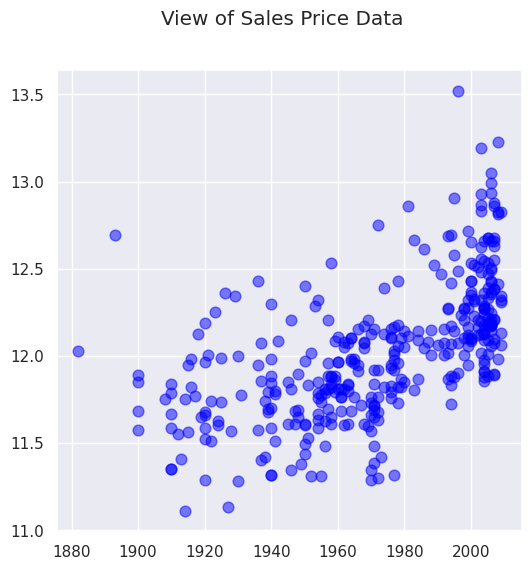

In [94]:
# Visualize actual vs predicted selling prices against YEARBUILT
# Blue points: Actual values, Red points: Predicted values
two_vs_three(X_test_slr[:, 0], y_test_slr, y_pred_slr, None, True)

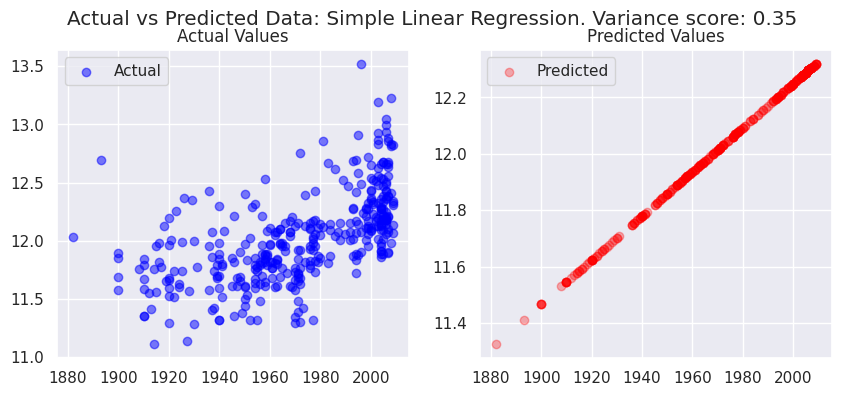

In [112]:
# Compare actual vs predicted values in 2D for the given model
# Visualizes the relationship between features and predictions
two_d_compare(X_test_slr, y_test_slr, y_pred_slr, model_name)



In [113]:
# Calculate performance metrics for the Simple Linear Regression model
slrMetrics = model_metrics(slRegressor, y_test_slr, y_pred_slr)

Root Mean Squared Error: 0.31
R² Score: 0.35


In [128]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

def compare_regression_results(X_test, y_test, y_pred, model_name):
    """
    Compares actual vs predicted values in three 2D scatter plots for a given model.

    Args:
        X_test (array-like): The input features used for testing.
        y_test (array-like): The actual target values (ground truth).
        y_pred (array-like): The predicted target values from the model.
        model_name (str): The name of the model being evaluated.

    Returns:
        None. Displays a figure with two subplots: one for actual values, one for predicted values, and a separate figure for the overlapping plot.
    """
    # Calculate R² score for the title
    r2 = r2_score(y_test, y_pred)

    # Create a figure with two subplots for actual and predicted values
    plt.figure(figsize=(15, 5))

    # Set the overall title for the figure
    plt.suptitle(f'Actual vs Predicted Data: {model_name}. Variance score: {r2:.2f}', fontsize=16)

    # First subplot: Scatter plot of actual values
    plt.subplot(121)  # 1 row, 2 columns, 1st position
    plt.scatter(X_test, y_test, alpha=0.5, color='blue', label='Actual')
    plt.title('Actual Values')
    plt.xlabel('X Test')
    plt.ylabel('Y Test')
    plt.legend()

    # Second subplot: Scatter plot of predicted values
    plt.subplot(122)  # 1 row, 2 columns, 2nd position
    plt.scatter(X_test, y_pred, alpha=0.3, color='red', label='Predicted')
    plt.title('Predicted Values')
    plt.xlabel('X Test')
    plt.ylabel('Y Predicted')
    plt.legend()

    # Adjust layout and display the first figure
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
    plt.show()

    # Create a separate figure for the overlapping plot
    plt.figure(figsize=(7, 5))
    plt.scatter(X_test, y_test, alpha=0.5, color='blue', label='Actual')
    plt.scatter(X_test, y_pred, alpha=0.3, color='red', label='Predicted')
    plt.title('Actual vs Predicted')
    plt.xlabel('X Test')
    plt.ylabel('Values')
    plt.legend()

    # Display the overlapping plot
    plt.show()

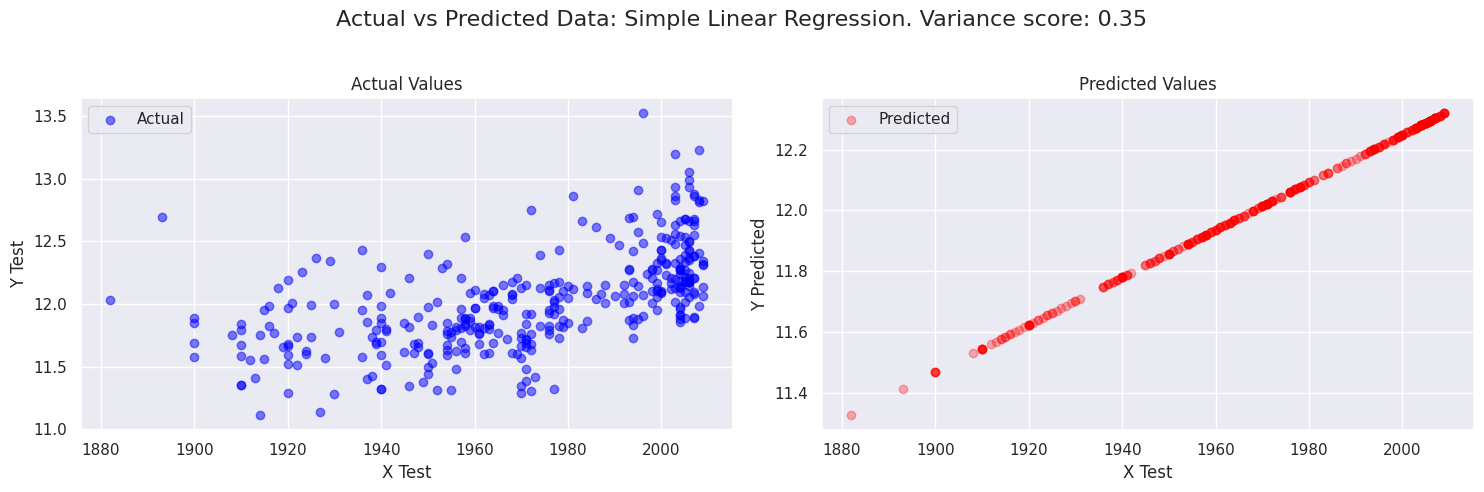

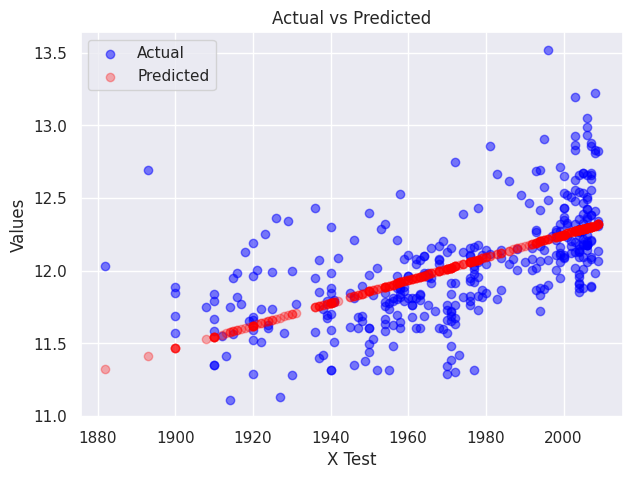

In [129]:
compare_regression_results(X_test_slr, y_test_slr, y_pred_slr, model_name)




---


### Multiple linear regression model

Multiple linear regression is an extension to the simple linear regression. In this setup, the target value is dependant on more than one variable. The number of variables depends on the use case at hand. Usually, a subject matter expert is involved in identifying the fields that contribute towards a better predicting the output feature.

$$
y = w_0 + w_1x_1 + w_2x_2 + \dots + w_nx_n
$$


---


Because multiple linear regression assumes that output depends on more than one variable, you are assuming that it depends on all of the 30 features. Data is split into training and test sets. As an experiment, you can try to remove a few features and check whether the model performs any better.


In [35]:
# Split the dataset into training and testing sets (random_state=0 for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(features, label, random_state=0)

# Print the dimensions of the training and testing datasets
print("Training dataset dimensions: Input features " + str(X_train.shape) + ", Output label " + str(y_train.shape))
print("Testing dataset dimensions: Input features " + str(X_test.shape) + ", Output label " + str(y_test.shape))

Training dataset dimensions: Input features (1095, 30), Output label (1095,)
Testing dataset dimensions: Input features (365, 30), Output label (365,)


In [36]:
# Import the LinearRegression class from scikit-learn
# LinearRegression is a statistical method used to model the relationship between a dependent variable (target)
# and one or more independent variables (features). It is widely used for predictive analysis.

from sklearn.linear_model import LinearRegression

# Define the model name for clarity
# Assigning a name to the model helps in identifying the type of regression being used,
# especially when working with multiple models in the same project.

model_name = 'Multiple Linear Regression'

# Initialize the Linear Regression model
# mlRegressor is an instance of the LinearRegression class. This object will be used to fit the model to the data
# and make predictions. It contains methods like `fit` (for training) and `predict` (for making predictions).

mlRegressor = LinearRegression()

# Create a pipeline that preprocesses the data and applies the regression model
# A pipeline combines preprocessing steps and the regression model into a single object, ensuring that the same
# transformations are applied consistently to both training and test data. This reduces the risk of data leakage
# and makes the code more modular and reusable.
# - 'preprocessorAll': A preprocessing step (e.g., scaling, encoding) applied to all features.
# - 'regressor': The Linear Regression model that will be applied to the preprocessed data.

mlr_model = Pipeline(steps=[('preprocessorAll', preprocessorForAllColumns), ('regressor', mlRegressor)])

# Fit the model to the training data
# The `fit` method trains the model on the training data (X_train) and the corresponding target values (y_train).
# During this process, the model learns the relationship between the features and the target variable by
# adjusting its internal parameters (e.g., coefficients and intercept).

mlr_model.fit(X_train, y_train)

# Make predictions on the test data
# The `predict` method uses the trained model to generate predictions for the test data (X_test).
# These predictions (y_pred_mlr) can be compared to the actual target values (y_test) to evaluate the model's performance.

y_pred_mlr = mlr_model.predict(X_test)

# Print the Linear Regression model details
# Printing the model object provides information about its configuration, such as the coefficients and intercept.
# This is useful for understanding the model's structure and for debugging purposes.

print(mlRegressor)

LinearRegression()


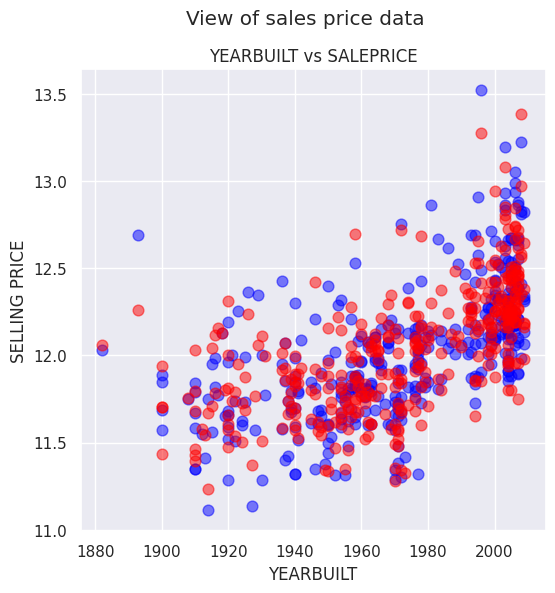

In [37]:
# Compare the performance of a two-variable model against a three-variable model using the test dataset.
# The function takes the year built, actual target values, predicted values from the multiple linear regression model,
# lot area, and a boolean flag for additional options (e.g., plotting).
two_vs_three(X_test['YEARBUILT'], y_test, y_pred_mlr, X_test['LOTAREA'], True)


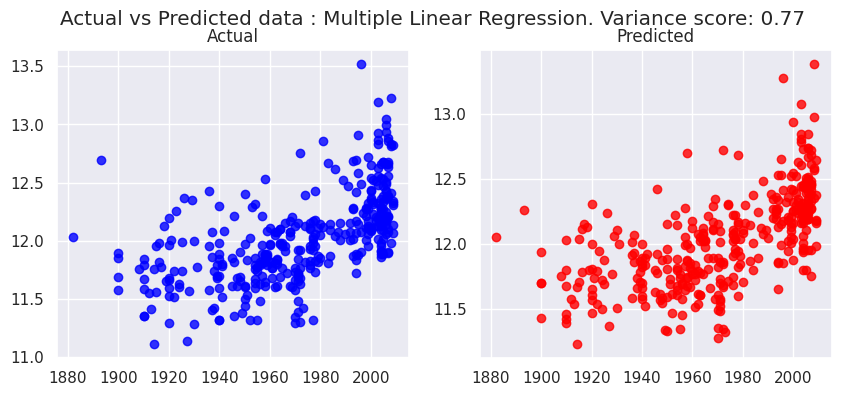

In [38]:

# Perform a comparison of the two models (presumably a two-variable model and a three-variable model)
# using the test dataset. This function likely visualizes or summarizes the performance metrics.
two_d_compare(X_test['YEARBUILT'], y_test, y_pred_mlr, model_name)


In [39]:

# Calculate and store the performance metrics of the multiple linear regression model.
# This includes metrics such as R-squared, Mean Absolute Error, Mean Squared Error, etc.
mlrMetrics = model_metrics(slRegressor, y_test, y_pred_mlr)

Root mean squared error: 0.18
R2 score: 0.77


### Decision tree regressor


---


A decision tree-based model builds a set of rules from the training data to be able to predict the outcome. For the sake of understanding, this algorithm is compared to trees formed through decisions. The model contains branches that represent the rules that lead to the path of the outcome, that is, the leaf. Each prediction path leads to a leaf that contains multiple values. The same principle is applied to classification-type problems as well. For regression-type problems, the final prediction is usually the average of all of the values contained in the leaf it falls under.


---



In [40]:
# Split the dataset into training and testing sets.
# 'features' contains the input features, and 'np.log(df_pd['SALEPRICE'])' applies a logarithmic transformation to the target variable 'SALEPRICE'.
# The random_state parameter ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(features, np.log(df_pd['SALEPRICE']), random_state=0)

# Print the dimensions of the training datasets.
# This includes the shape of the input features (X_train) and the output labels (y_train).
print("Dimensions of datasets that will be used for training: Input features " + str(X_train.shape) +
      ". Output label " + str(y_train.shape))

# Print the dimensions of the testing datasets.
# This includes the shape of the input features (X_test) and the output labels (y_test).
print("Dimensions of datasets that will be used for testing: Input features " + str(X_test.shape) +
      ". Output label " + str(y_test.shape))

Dimensions of datasets that will be used for training: Input features (1095, 30). Output label (1095,)
Dimensions of datasets that will be used for testing: Input features (365, 30). Output label (365,)


In [41]:
# Import the DecisionTreeRegressor class from the sklearn.tree module.
from sklearn.tree import DecisionTreeRegressor

# Define a string variable to hold the name of the model being used.
model_name = "Decision Tree Regressor"

# Initialize the DecisionTreeRegressor with a fixed random state for reproducibility
# and set the maximum number of features to consider when looking for the best split.
decisionTreeRegressor = DecisionTreeRegressor(random_state=0, max_features=30)

# Create a pipeline that first applies preprocessing to all columns and then fits the Decision Tree Regressor.
# The 'preprocessorForAllColumns' is assumed to be a preprocessing step defined elsewhere in the code.
dtr_model = Pipeline(steps=[('preprocessorAll', preprocessorForAllColumns), ('regressor', decisionTreeRegressor)])

# Fit the pipeline model to the training data (X_train and y_train).
dtr_model.fit(X_train, y_train)

# Use the fitted model to make predictions on the test dataset (X_test).
y_pred_dtr = dtr_model.predict(X_test)

# Print the details of the Decision Tree Regressor model to the console.
print(decisionTreeRegressor)

DecisionTreeRegressor(max_features=30, random_state=0)


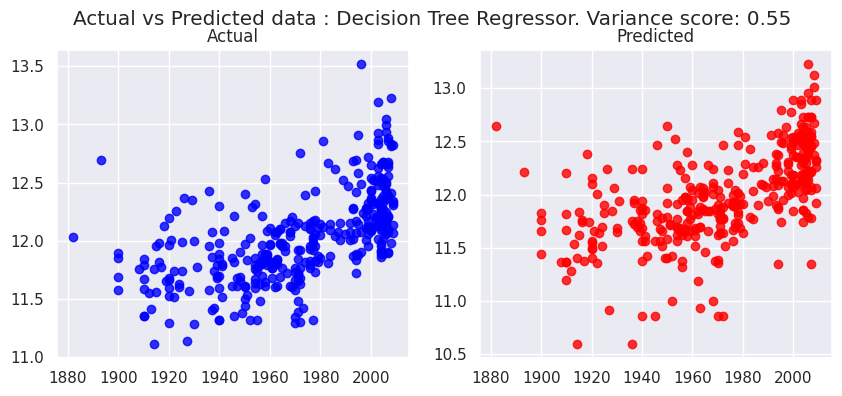

In [42]:
# Compare the performance of the Decision Tree Regressor model using the test dataset.
# This function likely visualizes or summarizes the performance metrics based on the year built,
# actual target values (y_test), predicted values (y_pred_dtr), and the model name.
two_d_compare(X_test['YEARBUILT'], y_test, y_pred_dtr, model_name)


In [43]:

# Calculate and store the performance metrics of the Decision Tree Regressor model.
# This includes metrics such as R-squared, Mean Absolute Error, Mean Squared Error, etc.,
# using the actual target values (y_test) and the predicted values (y_pred_dtr).
dtrMetrics = model_metrics(decisionTreeRegressor, y_test, y_pred_dtr)

Root mean squared error: 0.26
R2 score: 0.55


### Random forest regressor


---


Decision tree algorithms are efficient in eliminating columns that don't add value in predicting the output and in some cases, you are even able to see how a prediction was derived by backtracking the tree. However, this algorithm doesn't perform individually when the trees are huge and are hard to interpret. Such models are often referred to as weak models. However, the model performance is improvised by taking an average of several such decision trees derived from the subsets of the training data. This approach is called the random forest regression.


---



In [44]:
# Import the RandomForestRegressor class from the sklearn.ensemble module to use for regression tasks.
from sklearn.ensemble import RandomForestRegressor

# Define a string variable to hold the name of the model being used for clarity in reporting results.
model_name = "Random Forest Regressor"

# Initialize the RandomForestRegressor with specified parameters:
# n_estimators sets the number of trees in the forest, max_depth limits the maximum depth of each tree,
# and random_state ensures reproducibility of results.
randomForestRegressor = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=0)

# Create a pipeline that first applies preprocessing to all columns and then fits the Random Forest Regressor.
# The 'preprocessorForAllColumns' is assumed to be a preprocessing step defined elsewhere in the code.
rfr_model = Pipeline(steps=[('preprocessorAll', preprocessorForAllColumns), ('regressor', randomForestRegressor)])

# Fit the pipeline model to the training data (X_train and y_train) to train the Random Forest Regressor.
rfr_model.fit(X_train, y_train)

# Use the fitted model to make predictions on the test dataset (X_test) and store the results in y_pred_rfr.
y_pred_rfr = rfr_model.predict(X_test)

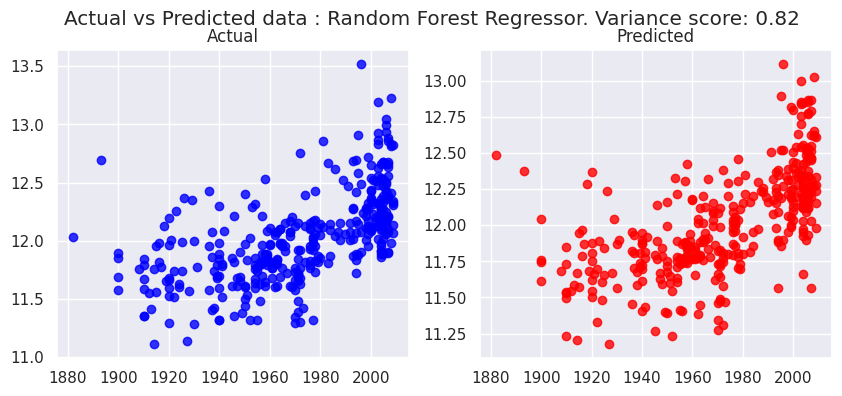

In [45]:
two_d_compare(X_test['YEARBUILT'], y_test, y_pred_rfr, model_name)

In [46]:
rfrMetrics = model_metrics(randomForestRegressor, y_test, y_pred_rfr)

Root mean squared error: 0.16
R2 score: 0.82


### Comparative study of different regression algorithms



In the following bar chart, you have compared the performances of different regression algorithms with each other.

Mean squared error (MSE) and R2 are some of the popular metrics that are used to compare different regression algorithms.

MSE is calculated by getting the mean of the squared error. Here, error refers to the distance between an actual and predicted value. The closer the MSE is to 0, the better the model performance is. However, you are using the root of the MSE here so that it is more easily interpreted (units are in dollars instead of being in dollars-squared).

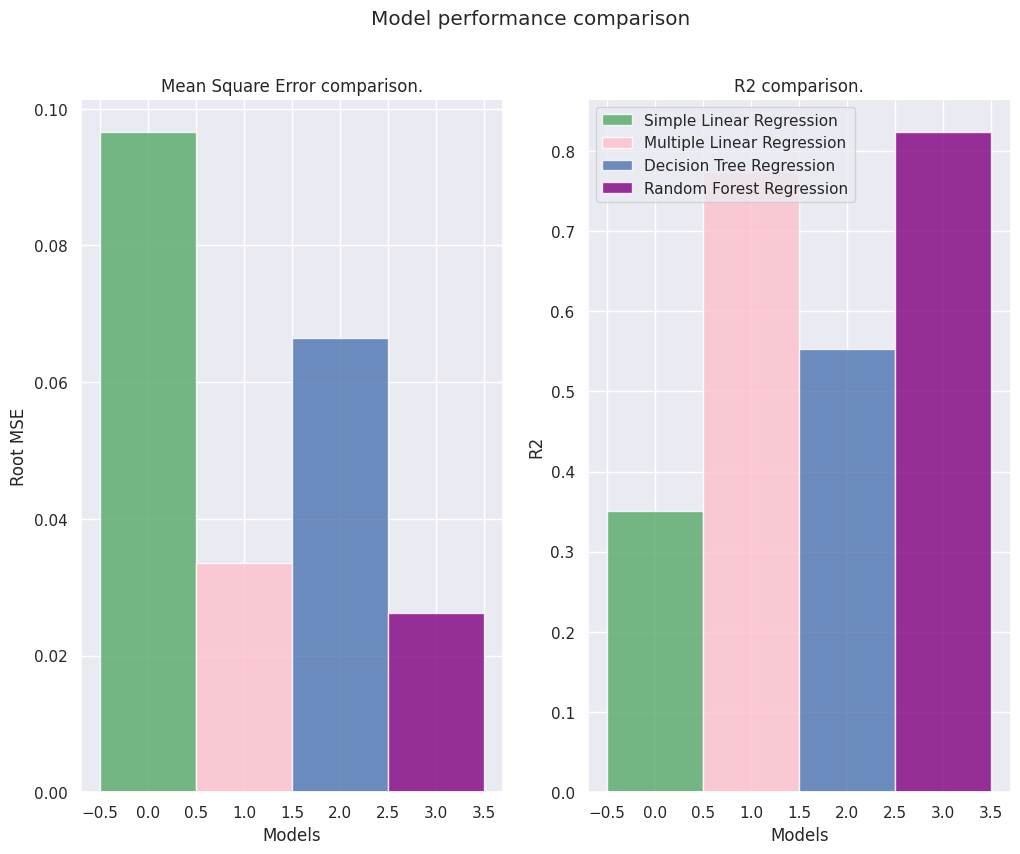

In [47]:
# Set the number of groups for the bar chart (in this case, only one group).
n_groups = 1

# Create an array of indices for the bar positions.
index = np.arange(n_groups)

# Define the width of the bars in the bar chart.
bar_width = 1

# Set the opacity for the bars in the bar chart.
opacity = 0.8

# Set the area for the plot (not used in this snippet, but could be for layout purposes).
area = 60

# Create a figure with two subplots side by side, with a specified size.
plt.subplots(ncols=2, figsize=(12, 9))

# Set the overall title for the figure.
plt.suptitle('Model performance comparison')

# Create the first subplot for Mean Square Error (MSE) comparison.
plt.subplot(121)

# Reinitialize index for the bar positions (not necessary since it's already defined).
index = np.arange(n_groups)

# Create bars for the Simple Linear Regression model's MSE.
rects1 = plt.bar(index, slrMetrics[0], bar_width,
                 alpha=opacity,
                 color='g',
                 label='Simple Linear Regression')

# Create bars for the Multiple Linear Regression model's MSE.
rects2 = plt.bar(index + bar_width, mlrMetrics[0], bar_width,
                 alpha=opacity,
                 color='pink',
                 label='Multiple Linear Regression')

# Create bars for the Decision Tree Regression model's MSE.
rects4 = plt.bar(index + bar_width*2, dtrMetrics[0], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Decision Tree Regression')

# Create bars for the Random Forest Regression model's MSE.
rects6 = plt.bar(index + bar_width*3, rfrMetrics[0], bar_width,
                 alpha=opacity,
                 color='purple',
                 label='Random Forest Regression')

# Set the x-axis label for the MSE subplot.
plt.xlabel('Models')

# Set the y-axis label for the MSE subplot.
plt.ylabel('Root MSE')

# Set the title for the MSE comparison subplot.
plt.title('Mean Square Error comparison.')

# Create the second subplot for R-squared (R2) comparison.
plt.subplot(122)

# Create bars for the Simple Linear Regression model's R2 value.
rects1 = plt.bar(index, slrMetrics[1], bar_width,
                 alpha=opacity,
                 color='g',
                 label='Simple Linear Regression')

# Create bars for the Multiple Linear Regression model's R2 value.
rects2 = plt.bar(index + bar_width, mlrMetrics[1], bar_width,
                 alpha=opacity,
                 color='pink',
                 label='Multiple Linear Regression')

# Create bars for the Decision Tree Regression model's R2 value.
rects4 = plt.bar(index + bar_width*2, dtrMetrics[1], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Decision Tree Regression')

# Create bars for the Random Forest Regression model's R2 value.
rects6 = plt.bar(index + bar_width*3, rfrMetrics[1], bar_width,
                 alpha=opacity,
                 color='purple',
                 label='Random Forest Regression')

# Set the x-axis label for the R2 subplot.
plt.xlabel('Models')

# Set the y-axis label for the R2 subplot.
plt.ylabel('R2')

# Set the title for the R2 comparison subplot.
plt.title('R2 comparison.')

# Set the x-tick labels for the models in the R2 subplot.
ax.set_xticklabels(('', 'Simple Lin', 'Multiple Lin', 'Decision Tree', 'Random Forest'))

# Add a legend to the plot to identify the models.
plt.legend()

# Display the plot.
plt.show()

# Exercises

We have prepared another sample data.

In [48]:
car_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/exN-VGWhy9OjnXIevpKh5g/cars.csv')
car_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [49]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=car_df)

https://docs.google.com/spreadsheets/d/1hjs90Gx1L1dKVXCOU04OdN2vn5jfwQG-uFFAgMR6gkc/edit#gid=0


In [50]:
# Removing unnecessary columns
car_df = car_df.drop(['Car_ID'], axis=1)

In [51]:
car_df.head()

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
